### Learning objectives
By the end of this lesson, you will be able to:

- Apply transformations to make target variable more normally distributed for Regression
- Apply inverse transformations to be able to use these in a Regression context

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import normaltest
%matplotlib inline

# Surpress warnings:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

### Loading the Boston Housing Data


1. Cargamos los datos que estan en formato pickle `rb`= lectura binaria ya que los archivos pickle son de este estilo.

In [2]:
with open('boston_housing_clean.pickle', 'rb') as to_read:
    boston = pd.read_pickle(to_read)
boston_data = boston['dataframe']
boston_description = boston['description']

In [3]:
boston_data.head(15)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,386.71,17.10,18.9


### Determinar la normalidad 
1. Target variable (y) -> Distribución normal
    - Visual approach
    - test estadístico
2. Métodos para transformar a una D. normal
    - Log transformation
    - Square root transformation
    - Box cox transformation
3. Test estadistico -> p-value > 0.05 para que sea una distribución normal.

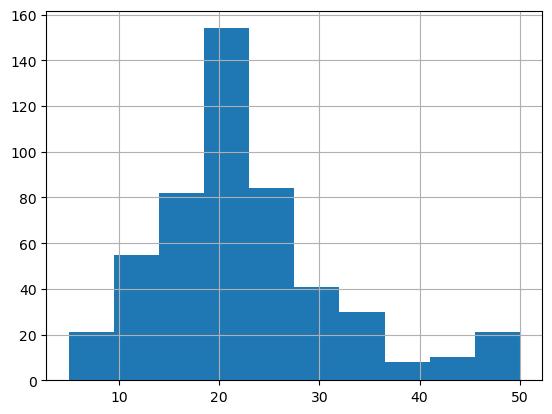

In [4]:
boston_data.MEDV.hist();
plt.show()

In [5]:
from scipy.stats.mstats import normaltest # D'Agostino K^2 Test


In [6]:
normaltest(boston_data.MEDV.values)


NormaltestResult(statistic=90.9746873700967, pvalue=1.7583188871696095e-20)

p-value is _extremely low_. Our **y** variable which we have been dealing with this whole time was not normally distributed!

**Apply transformation to Boston Housing data:**



In [7]:
log_medv = np.log(boston_data.MEDV)

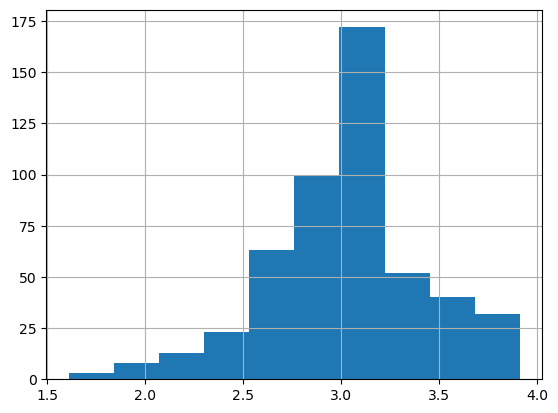

In [8]:
log_medv.hist();
plt.show()

In [9]:
normaltest(log_medv)

NormaltestResult(statistic=17.21801696640698, pvalue=0.00018245472768345196)

Conclusion: The output is closer to normal distribution, but still not completely normal.



**Square root Transformation**


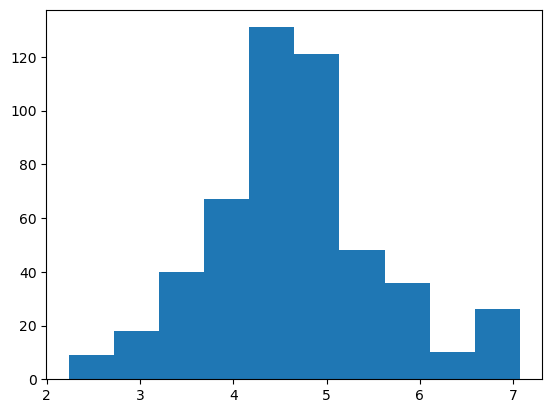

In [10]:
sqrt_medv = np.sqrt(boston_data.MEDV)
plt.hist(sqrt_medv)
plt.show()

In [11]:
normaltest(sqrt_medv)

NormaltestResult(statistic=20.487090826863067, pvalue=3.558645701429252e-05)

**Box cox Transformation**

In [12]:
from scipy.stats import boxcox


In [13]:
bc_result = boxcox(boston_data.MEDV)
boxcox_medv = bc_result[0]
lam = bc_result[1]

In [14]:
lam


0.21662090066621686

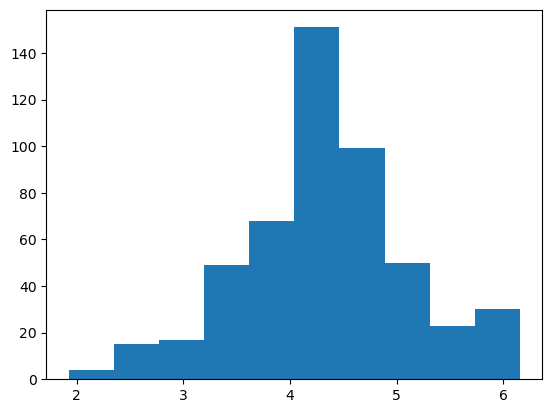

In [15]:
plt.hist(boxcox_medv);
plt.show()

In [16]:
normaltest(boxcox_medv)


NormaltestResult(statistic=4.513528777459214, pvalue=0.10468866918093613)

We find that the box cox results in a graph which is significantly more normally distributed (according to p value) than the other two distributions.This can be even above 0.05.

### Testing regression:


In [17]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import (StandardScaler, 
                                   PolynomialFeatures)

In [18]:
lr = LinearRegression()


**Define and load the predictor (X) and Target(y) variables**

In [19]:
y_col = "MEDV"

X = boston_data.drop(y_col, axis=1)
y = boston_data[y_col]

**Create Polynomial Features** -> para mejorar la regresión lineal

In [20]:
pf = PolynomialFeatures(degree=2, include_bias=False)
X_pf = pf.fit_transform(X)

**Split the data into Training and Test Sets**

The split ratio here is 0.7 and 0.3 which means we will assign **70%** data for training and **30%** data for testing

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X_pf, y, test_size=0.3, 
                                                    random_state=72018)

**Normalize the training data using `StandardScaler` on `X_train`. Use fit_transform() function**



In [22]:
s = StandardScaler()
X_train_s = s.fit_transform(X_train)
X_test_s = s.transform(X_test)

**Fit Regression**

In [23]:
lr.fit(X_train_s,y_train)


LinearRegression()

**Predict**

In [24]:
lr_pred = lr.predict(X_test_s)
r_lineal = r2_score(y_test,lr_pred)
r_lineal

0.868911046923101

### Applying inverse transformation boxcox on target variable (y)

**Apply the appropriate transformation.**

In [25]:
bc_result2 = boxcox(y_train)
y_train_bc = bc_result2[0]
lam2 = bc_result2[1]

In [26]:
y_train_bc.shape


(354,)

**Fit `X_train_s` and `y_train_bc` and then predict_bc**

In [27]:
lr.fit(X_train_s, y_train_bc)
y_pred_bc = lr.predict(X_test_s)

**Apply inverse transformations to be able to use these in a Regression context**

In [28]:
from scipy.special import inv_boxcox


In [29]:
inv_boxcox(boxcox_medv, lam)[:10]


array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9])

In [30]:
boston_data['MEDV'].values[:10]


array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9])

Exactly the same, as we would hope!



**Hint: Use the inv_boxcox() function to get the transformed predicted values**

In [31]:
y_pred_tran = inv_boxcox(y_pred_bc, lam2)
r_lineal_boxcox = r2_score(y_test, y_pred_tran)
r_lineal_boxcox

0.8884878245852588

**comparacion**

In [32]:
results = {
    'Regresion lineal': r_lineal,
    'Regresion lineal Box-cox': r_lineal_boxcox
}

df_comp = pd.DataFrame(results, index=['R²_score'])
df_comp

,Regresion lineal,Regresion lineal Box-cox
R²_score,0.868911,0.888488
